# 911 Calls Project

## Data Exploration and Cleaning

*Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

*Import visualization libraries

In [2]:
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

import seaborn as sns

%matplotlib inline

*Read in the csv file

In [4]:
calls = pd.read_csv('911.csv')

In [5]:
#see the head of the DataFrame

calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#see info and description

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
calls.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


*Explore the data through some visualizations

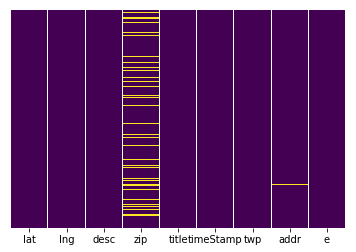

In [8]:
#Use seaborn's heatmap to see missing data

sns.heatmap(calls.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
#Most missing data is in the zipcodes
#Only a little data is missing in the address column,so we can
# actually drop the missing data in the cleaning process

In [10]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
#See the number of townships

calls['twp'].nunique()

68

# Data Cleaning

In [12]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [15]:
#Drop some columns into a new DataFrame not to overwrite the current one

clean_calls = calls.drop(['desc', 'twp', 'addr', 'e'], axis=1)

In [16]:
#See head of the new DataFrame

clean_calls.head()

,lat,lng,zip,title,timeStamp
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,2015-12-10 17:40:01


In [20]:
#Note that the title columns lists the reason of the call/emergency
#There are three major reasons:
#    EMS
#    Fire
#    Traffic

In [21]:
#So we can make a column based off of these reasons

clean_calls['Reason'] = clean_calls['title'].apply(lambda title: title.split(':')[0])

In [22]:
clean_calls.head()

,lat,lng,zip,title,timeStamp,Reason
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,EMS
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,EMS


In [23]:
#We can now drop the title column

clean_calls.drop('title', axis=1, inplace=True)

In [32]:
#Now lets check the type of the timeStamp column
#If it's in string format we'll convert it to datetime

clean_calls['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
5        2015-12-10 17:40:01
6        2015-12-10 17:40:01
7        2015-12-10 17:40:01
8        2015-12-10 17:40:01
9        2015-12-10 17:40:01
10       2015-12-10 17:40:01
11       2015-12-10 17:40:02
12       2015-12-10 17:40:02
13       2015-12-10 17:40:02
14       2015-12-10 17:40:02
15       2015-12-10 17:40:02
16       2015-12-10 17:46:01
17       2015-12-10 17:47:01
18       2015-12-10 17:47:01
19       2015-12-10 17:47:02
20       2015-12-10 17:47:02
21       2015-12-10 17:57:02
22       2015-12-10 18:02:01
23       2015-12-10 18:02:02
24       2015-12-10 18:02:02
25       2015-12-10 18:06:25
26       2015-12-10 18:06:25
27       2015-12-10 18:06:25
28       2015-12-10 18:06:26
29       2015-12-10 18:11:01
                ...         
99462    2016-08-24 09:41:00
99463    2016-08-24 09:42:00
99464    2016-08-24 09:51:06
99465    2016-

In [33]:
#We can see that it's not in datetime format
#Convert it to datetime

clean_calls['timeStamp'].apply(pd.to_datetime)

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

In [35]:
#Remember that the zip column is missing a lot of data
#But the data seems to be in a rather 'constant' range
#So we can autofill the missing values to be the mean of the available values

In [48]:
clean_calls['zip'].fillna(value=clean_calls['zip'].mean(), inplace=True)

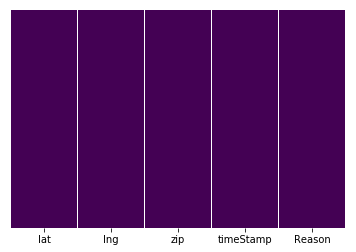

In [51]:
#Check that the column has no missing values

sns.heatmap(clean_calls.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
clean_calls.head()

,lat,lng,zip,timeStamp,Reason
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,EMS
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,EMS
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,Fire
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,EMS
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,EMS


In [70]:
#Get dummy variables for the Reason column and make that into a new column

reason = pd.get_dummies(clean_calls['Reason'], drop_first=True)

In [71]:
reason.head()

,Fire,Traffic
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [72]:
clean_calls = pd.concat([clean_calls, reason], axis=1)

In [73]:
clean_calls.head()

,lat,lng,zip,timeStamp,Reason,Fire,Traffic
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,EMS,0,0
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,EMS,0,0
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,Fire,1,0
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,EMS,0,0
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,EMS,0,0


In [74]:
#So we can now drop the Reason column

clean_calls.drop('Reason', axis=1, inplace=True)

In [75]:
clean_calls.head()

,lat,lng,zip,timeStamp,Fire,Traffic
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,0,0
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,0,0
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,1,0
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,0,0
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,0,0


In [76]:
#The data is now clean

In [81]:
#Save the cleaned DataFrame
clean_calls.to_csv('clean_calls.csv')

## Done!